In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
from multiprocessing import Pool
import pandas as pd
%matplotlib inline

### Validating our result for the surface from the equation we have

In [3]:
# This will give the suface temperature 
# As we have defined it to be 300 it should be for all z
def surfaceTemp(z,length,surfaceTemperature) :
    a = list(np.arange(0,100000))
    constantTerm = (4/np.pi)
    z = [np.sin(((2*x+1)*z)/length)/(2*x+1) for x in a]
    z=np.array(z)
    return surfaceTemperature*constantTerm*z.sum()

In [4]:
surfaceTemp(5,10,300)

300.00199054677984

In [14]:
# Assuming the length of the cylinder as 543
lengthOfCylinder = np.pi
# And the radius f the cylinder as 490 
maxRadius = 1
radialSurfaceTemperature = 300
z = np.linspace(0,lengthOfCylinder,100)
surf = [surfaceTemp(x,lengthOfCylinder,radialSurfaceTemperature) for x in z]

### Plotting the surface temperature as the function of z 

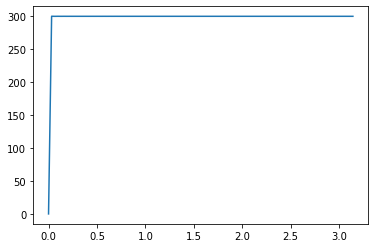

In [15]:
plt.plot(z,surf)

###### This plot shows that the surface temperature is constant in radial direction 
###### And the result matches with our initial assumption 

In [16]:
def tempDistributionCylinder(r,maxRadius,z,length,radialSurfaceTemperature,noOfTerms) :
    a = np.arange(0,noOfTerms)
    constantTerm = (4*radialSurfaceTemperature)/np.pi
    a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin(((2*n+1)*np.pi*z)/length)/(2*n+1)) for n in a]
    a = np.array(a)
    a = a.sum()
    return a*constantTerm

In [17]:
# Our result will definately depend on the no. of the terms we use for the summation 

## Plotting the surface temperature as the function of no. of terms we consider for the summation

C:\Users\vibhe\AppData\Local\Temp/ipykernel_21248/3192101107.py:4: RuntimeWarning: invalid value encountered in double_scalars
  a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin(((2*n+1)*np.pi*z)/length)/(2*n+1)) for n in a]


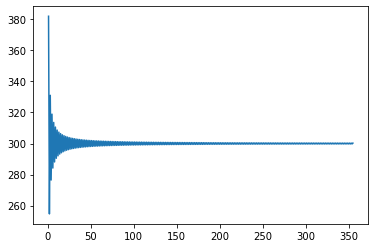

In [18]:
a = np.arange(1,2000)
b = [tempDistributionCylinder(maxRadius,maxRadius,lengthOfCylinder/2,lengthOfCylinder,300,x) for x in a ]
plt.plot(a,b)

In [19]:
### After the 1400 terms our values are not upto the precession so it gives the Nan values a
### But the result seems to saturate with around 300 terms 
### The Graph seems to be falactuating ihn nature  

C:\Users\vibhe\AppData\Local\Temp/ipykernel_21248/3192101107.py:4: RuntimeWarning: invalid value encountered in double_scalars
  a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin(((2*n+1)*np.pi*z)/length)/(2*n+1)) for n in a]


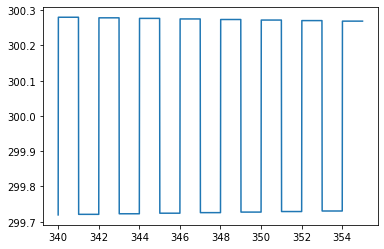

In [23]:
# Exaggeratted view of the graph for these particular values 
a = np.arange(340,360,0.01)
b = [tempDistributionCylinder(maxRadius,maxRadius,lengthOfCylinder/2,lengthOfCylinder,300,x) for x in a ]
plt.plot(a,b)

Radial Temperature variation at mid point of the cylinder

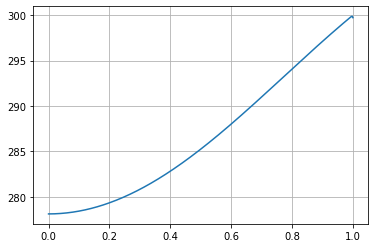

In [24]:
# Radial Temperature Distribution of the cylinder 
r = np.linspace(0,maxRadius,400)
radialTemp = [tempDistributionCylinder(x,maxRadius,lengthOfCylinder/2,lengthOfCylinder,300,350) for x in r]
# print(radialTemp)
plt.plot(r,radialTemp)
plt.grid()

Axail Temperature Distribution 

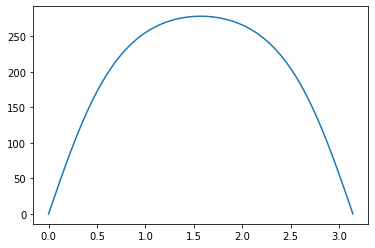

In [22]:
z = np.linspace(0,lengthOfCylinder,600) 
axialTemp = [tempDistributionCylinder(0,maxRadius,x,lengthOfCylinder,300,720) for x in z]
plt.plot(z,axialTemp)
# print(radialTemp)

## Comparision of Results 

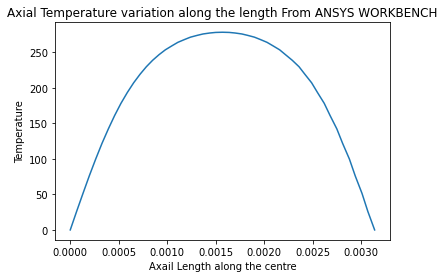

In [30]:
## Reading the data that we exported from the Ansys WorkBench
df = pd.read_excel("fatafat.xlsx")
plt.title("Axial Temperature variation along the length From ANSYS WORKBENCH")
plt.xlabel("Axail Length along the centre")
plt.ylabel("Temperature")
plt.plot(df["z"],df["Temp"])


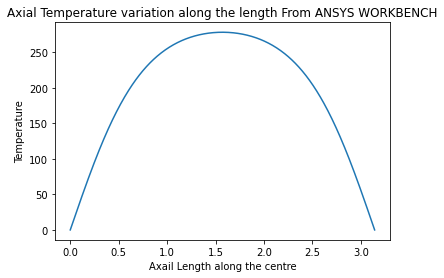

In [32]:
# Temperature Distribution from our SOlution of Differential Equation 
z = np.linspace(0,lengthOfCylinder,600) 
axialTemp = [tempDistributionCylinder(0,maxRadius,x,lengthOfCylinder,300,720) for x in z]
plt.title("Axial Temperature variation along the length From ANSYS WORKBENCH")
plt.xlabel("Axail Length along the centre")
plt.ylabel("Temperature")
plt.plot(z,axialTemp)
# print(radialTemp)

## Comparision of Both the Results

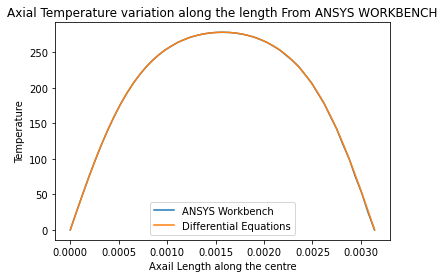

In [34]:
plt.plot(df["z"],df["Temp"])
# Temperature Distribution from our SOlution of Differential Equation 
z = np.linspace(0,lengthOfCylinder,600) 
axialTemp = [tempDistributionCylinder(0,maxRadius,x,lengthOfCylinder,300,720) for x in z]
plt.title("Axial Temperature variation along the length From ANSYS WORKBENCH")
plt.xlabel("Axail Length along the centre")
plt.ylabel("Temperature")
z = z/1000
plt.plot(z,axialTemp)
# print(radialTemp)
plt.legend(("ANSYS Workbench","Differential Equations"),loc='best')

In [13]:
# It is clear from the above graphs that atleast out Boundary Conditions are satisfied 

x1x2 (500,) (500,)
X1 X2 (500, 500) (500, 500)


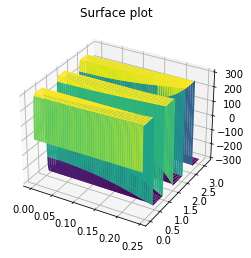

In [14]:
# Surface Plot of the temperature distribution 
r = np.linspace(0,maxRadius,500)
z = np.linspace(0,np.pi,500)
print("x1x2",r.shape, z.shape)
X1, X2 = np.meshgrid(r, z)
print("X1 X2",X1.shape, X2.shape)
xdata = np.vstack((X1.ravel(), X2.ravel()))
z = []

for i in range(len(xdata[0])):
    a1 = xdata[0][i]
    a2 = xdata[1][i]
    z.append(tempDistributionCylinder(a1,maxRadius,a2,lengthOfCylinder,300,720))

z = np.array(z)
z = z.reshape(500,500)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()


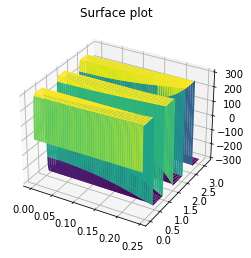

In [15]:
z = np.array(z)
z = z.reshape(500,500)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

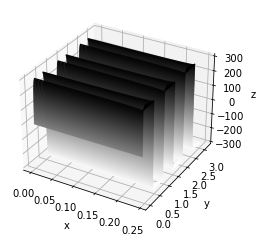

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Text(0.5, 0.92, 'wireframe')

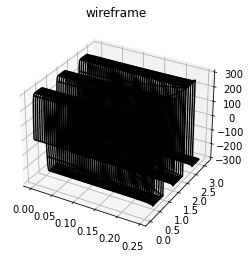

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, z, color='black')
ax.set_title('wireframe')

In [18]:
tempDistributionCylinder(0,maxRadius,lengthOfCylinder/2,lengthOfCylinder,300,720)

299.9998064867414